# STSA Python pattern: Houston Flood data


![Hurricane Harvey](https://github.com/scottdangelo/houston-flood-2017/blob/master/doc/source/images/Harvey.png)

NASA TERRA MODIS INFRARED IMAGE OF HARVEY AT 0419 UTC 26 AUGUST 2017 JUST AFTER LANDFALL AS A
CATEGORY 4 HURRICANE IN TEXAS. IMAGE COURTESY OF UW/CIMSS. g

## 1.0 Install dependencies and import packages

### 1.1 Install pixiedust

We install the prerequisites using the `!pip install` syntax here.
In some cases, running pip install from a notebook may require a one-time kernel restart. Check the output for messages.
If instructed to restart the kernel, from the notebook toolbar menu: • Go to > Kernel > Restart • Click Restart in the confirmation dialog
> Note: The status of the kernel briefly flashes near the upper right corner, alerting when it is Not Connected, Restarting, Ready, etc. 

In [1]:
!pip install --upgrade pixiedust

Requirement already up-to-date: pixiedust in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s49d-fa6eebe94d4691-2ef1a5e3ed71/.local/lib/python3.5/site-packages (1.1.15)
Requirement not upgraded as not directly required: colour in /usr/local/src/conda3_runtime.v51/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages (from pixiedust) (0.1.5)
Requirement not upgraded as not directly required: lxml in /usr/local/src/conda3_runtime.v51/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages (from pixiedust) (4.1.0)
Requirement not upgraded as not directly required: geojson in /usr/local/src/conda3_runtime.v51/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages (from pixiedust) (1.3.5)
Requirement not upgraded as not directly required: astunparse in /usr/local/src/conda3_runtime.v51/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages (from pixiedust) (1.5.0)
Requirement not upgraded as not directly required: requests in /usr/local/src/conda3_runtime.v51/home/envs/DSX-Python35-S

### 1.2 Import the packages
Numpy is a package for scientific computing in Python.  
Pandas helps with data structures.  
[Pixiedust](https://pixiedust.github.io/pixiedust/) is a Python helper library for Jupyter notebooks.

In [2]:
import pandas as pd
import numpy as np
import pixiedust

Pixiedust database opened successfully


## 2.0 Obtain and curate data

In order to do data science, or data engineering, we'll need some data.
So, what problem are we trying to solve?

### Where in Houston does flooding occur, and which specific adresses are vulnerable?

### 2.1 Search for data
We are interested in the flooding in Houston on August, 2017, as a result of Hurricane Harvey.
Using a search engine, we can try `houston flood 2017 data`.  
That gave many results, mostly news stories. But there are some promising sites, many from US government agencies:  
* https://www.weather.gov
* https://txpub.usgs.gov/floodwatch/#page-top
* https://water.weather.gov/ahps2/index.php?wfo=hgx
* https://www.nhc.noaa.gov/data/tcr/AL092017_Harvey.pdf
* https://stn.wim.usgs.gov/STNDataPortal/#
* https://streamstats.usgs.gov/ss/

That's just the beginning, but hopefully it can lead to some data we can use.

### 2.2 Download and examine data
We'll look at some data from stream gauges in Houston, gathering historical data from the dates 8/23/2017 - 8/31/2017.  
I've grabbed the data for one stream gauge in the Houston Beltway area, Hunting Bayou, from the [waterdata.usgs.gov](https://waterdata.usgs.gov/nwis/nwismap/?site_no=08075763&agency_cd=USGS) site.

In [5]:
!wget "https://www.dropbox.com/s/ozxzpxwpmjp0ke6/HuntingtonBayou08075770?dl=0"
!mv HuntingtonBayou08075770?dl=0 HuntingBayou
!ls

--2019-03-06 10:59:31--  https://www.dropbox.com/s/ozxzpxwpmjp0ke6/HuntingtonBayou08075770?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ozxzpxwpmjp0ke6/HuntingtonBayou08075770 [following]
--2019-03-06 10:59:31--  https://www.dropbox.com/s/raw/ozxzpxwpmjp0ke6/HuntingtonBayou08075770
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccf3944b85993cf6587c6ed0474.dl.dropboxusercontent.com/cd/0/inline/AcnAgixy4P48EQt5knncQQgKyZQiPm85Q6UHetl2pJEXXGniZtUBXPedTejq1xrIC1YvAHQC6gppJTnvpewbgoGnzwkfvI8xNape_TgeMwAyg6D2wFnS4_UnrjVsubGvW_E/file# [following]
--2019-03-06 10:59:31--  https://uccf3944b85993cf6587c6ed0474.dl.dropboxusercontent.com/cd/0/inline/AcnAgixy4P48EQt5knncQQgKyZQiPm85Q6UHetl2pJEXXGniZtUBXPedTejq1xrIC1YvAHQC6gpp

#### 2.3 First, let's look at the header to the file (which I've peeked at in an editor). This gives us some info on the contents:

In [16]:
! head -n 35 HuntingBayou

# ---------------------------------- WARNING ----------------------------------------
# Some of the data that you have obtained from this U.S. Geological Survey database
# may not have received Director's approval. Any such data values are qualified
# as provisional and are subject to revision. Provisional data are released on the
# condition that neither the USGS nor the United States Government may be held liable
# for any damages resulting from its use.
#
# Additional info: https://help.waterdata.usgs.gov/policies/provisional-data-statement
#
# File-format description:  https://help.waterdata.usgs.gov/faq/about-tab-delimited-output
# Automated-retrieval info: https://help.waterdata.usgs.gov/faq/automated-retrievals
#
# Contact:   gs-w_support_nwisweb@usgs.gov
# retrieved: 2019-02-27 16:27:28 EST       (nadww01)
#
# Data for the following 1 site(s) are contained in this file
#    USGS 08075770 Hunting Bayou at IH 610, Houston, TX
# ----------------------------------------------------

#### 2.4 Now we'll look at the pandas dataframe itself. I see from the header that I need to skip the first 29 rows (rows 0-28), that the data is tab separated, and the header begins on the 30th line (line 29).

In [9]:
df = pd.read_csv('HuntingBayou',sep='\t',skiprows=(0-28),header=(29))

In [17]:
df.head()

,agency_cd,site_no,datetime,tz_cd,140488_00060,140488_00060_cd,140489_00065,140489_00065_cd
0,5s,15s,20d,6s,14n,10s,14n,10s
1,USGS,08075770,2017-08-23 00:00,CDT,7.92,A,17.23,A
2,USGS,08075770,2017-08-23 00:15,CDT,7.92,A,17.23,A
3,USGS,08075770,2017-08-23 00:30,CDT,7.92,A,17.23,A
4,USGS,08075770,2017-08-23 00:45,CDT,7.92,A,17.23,A


#### 2.4 Do some data frame cleanup
What's with the extra fields on line 0? Let's delete that line.

In [23]:
df = df.drop(0)

We can rename those obscure column names, to give them a name that represents the data:

In [27]:
df.rename(columns={'140488_00060': 'Discharge(cfs)', '140489_00065': 'GuageHeight(feet)'}, inplace=True)

Let's replace the `site_no` with a `site_name` for `HuntingBayou`:

In [31]:
df.rename(columns={'site_no': 'site_name'}, inplace=True)
df['site_name'].replace("08075770", "HuntingBayou", inplace=True)

We don't care about the first `agency_cd` column, which is `USGS`, so let's drop it. The same goes for the `140488_00060_cd`, `140489_00065_cd`, and `tz_cd` columns. The `axis=1` denotes that this is a column.

In [36]:
df.drop('agency_cd', axis=1, inplace=True)
df.drop('140488_00060_cd', axis=1, inplace=True)
df.drop('140489_00065_cd', axis=1, inplace=True)
df.drop('tz_cd', axis=1, inplace=True)

Our `Discharge` and `GuageHeight` data are strings, but we need them to be floats. We'll convert them

In [43]:
df['GuageHeight(feet)'] = df['GuageHeight(feet)'].convert_objects(convert_numeric=True)
df['Discharge(cfs)'] = df['Discharge(cfs)'].convert_objects(convert_numeric=True)

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Our datetime has the year 2017 for all fields, but our graphs will be cleaner if we skip it

In [51]:
df['datetime'] = df['datetime'].map(lambda x: x.lstrip('2017-'))

And finally, we can get the latitude and longitude for this stream gauge at Hunting Bayou, so let's add a couple columnns with that data, to allow this to show up on a map.

In [38]:
df['latitude']='29.808611'
df['longitude']='-95.313056'

Now we can see our results.

In [52]:
df.head()

,site_name,datetime,tz_cd,Discharge(cfs),GuageHeight(feet),latitude,longitude
1,HuntingBayou,8-23 00:00,CDT,7.92,17.23,29.808611,-95.313056
2,HuntingBayou,8-23 00:15,CDT,7.92,17.23,29.808611,-95.313056
3,HuntingBayou,8-23 00:30,CDT,7.92,17.23,29.808611,-95.313056
4,HuntingBayou,8-23 00:45,CDT,7.92,17.23,29.808611,-95.313056
5,HuntingBayou,8-23 01:00,CDT,7.92,17.23,29.808611,-95.313056


### 2.5 Use pixiedust `display()` to  explore the schema and browse the data

#### 2.5.1 Select _DataFrame Table_ icon in the display widget to see the data in tabular form

![pixiedust dataframe icon](https://github.com/scottdangelo/houston-flood-2017/blob/master/doc/source/images/pixieDataFrameIcon.png)

#### 2.5.2 Select the chart icon to pull down and choose `line chart`. Click the `Options` button, and then for `Keys` drag and drop `datetime` and for `Values` drag and drop `Discharge`. This will display the water discharge at this stream gauge in cubic feet per second.

![pixie choose line chart](https://github.com/scottdangelo/houston-flood-2017/blob/master/doc/source/images/pixieChooseLineChart.png)

![pixie options datetime discharge](https://github.com/scottdangelo/houston-flood-2017/blob/master/doc/source/images/pixieOptionsDatetimeDischarge.png)


#### 2.5.4  Click the `Options` button, and then for `Keys` drag and drop `datetime` and for `Values` drag and drop `Gauge_Height`. This will display the height of the water at this stream gauge, in feet.


In [32]:
!wget "https://www.dropbox.com/s/smvfax2br0ez4bv/houston.geojson?dl=0"

--2019-03-04 22:51:10--  https://www.dropbox.com/s/smvfax2br0ez4bv/houston.geojson?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/smvfax2br0ez4bv/houston.geojson [following]
--2019-03-04 22:51:10--  https://www.dropbox.com/s/raw/smvfax2br0ez4bv/houston.geojson
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb5aa3231d428ba9a083d935362.dl.dropboxusercontent.com/cd/0/inline/Ace3OaGOa-MvTP-RRKl9R50cPRd34Jm06achR9AfHnKTNLQ2hj0RdykUelFesZWlvER5J-6rf36BU8KcPBC6XOKG3sNC8ITZBm2Vf4sDAPwjyt5dqwZzHp7QJZxm95SDX3E/file# [following]
--2019-03-04 22:51:11--  https://ucb5aa3231d428ba9a083d935362.dl.dropboxusercontent.com/cd/0/inline/Ace3OaGOa-MvTP-RRKl9R50cPRd34Jm06achR9AfHnKTNLQ2hj0RdykUelFesZWlvER5J-6rf36BU8KcPBC6XOKG3sNC8ITZBm2V


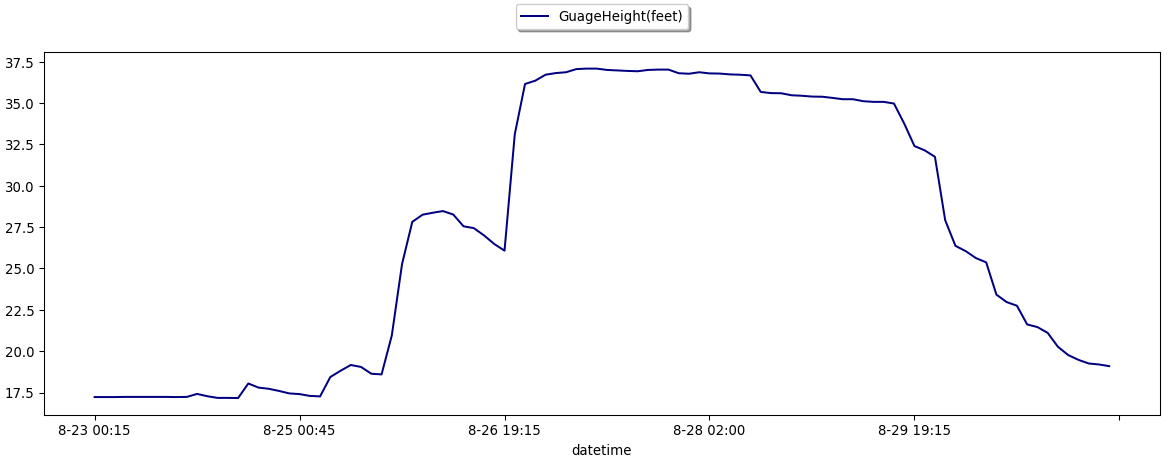

In [54]:
hunting = df
display(hunting)

### 2.x Gather data for Max stream flows
#### We have already:
* Found data we can use
* Cleaned the data
* Displayed the data

Next, let's aggregate stream Gauge Maximums for `Gauge Height` and `Discharge` so that we can put them on a map.
This is done offline, manually using a text editor after downloading from various stream gauges, and then put into a single file.

## 3.0 Create Pixie App

In [ ]:


!wget "https://www.dropbox.com/s/smvfax2br0ez4bv/houston.geojson?dl=0"

In [34]:
!mv houston.geojson?dl=0 houston.geojson
!ls

fHuntingBayou.csv?dl=0	houston.geojson   WhiteoakBayou.csv
foo.csv			HuntingBayou.csv


In [18]:
!wget "https://www.dropbox.com/s/dxr0fis01iudpog/maxFlood.csv?dl=0"

--2019-03-05 17:38:24--  https://www.dropbox.com/s/dxr0fis01iudpog/maxFlood.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dxr0fis01iudpog/maxFlood.csv [following]
--2019-03-05 17:38:24--  https://www.dropbox.com/s/raw/dxr0fis01iudpog/maxFlood.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc5d188295eff93c4c809cb9325.dl.dropboxusercontent.com/cd/0/inline/AcgQOdG_zp_mQLnExh1Tp6jalnRHmfctuK9k6otmRWlXZRe9BxbPJNvh5M_ndochKHuVRBwOHkTkkCW-kM1V5PUacQQA8ni4yCTWF9QxFMB5ZXeV7xnk6UxDF3G7PHdHAHU/file# [following]
--2019-03-05 17:38:25--  https://ucc5d188295eff93c4c809cb9325.dl.dropboxusercontent.com/cd/0/inline/AcgQOdG_zp_mQLnExh1Tp6jalnRHmfctuK9k6otmRWlXZRe9BxbPJNvh5M_ndochKHuVRBwOHkTkkCW-kM1V5PUacQQA8ni4yCTWF9QxFMB5Z

In [19]:
!mv maxFlood.csv?dl=0 maxFlood.csv
!ls

additional_feedback_data.json		HuntingBayou.csv
german_credit_data_biased_training.csv	maxFlood.csv
german_credit_feed.json			WhiteoakBayou.csv


In [20]:
maxFlood = pd.read_csv('maxFlood.csv')

In [21]:
maxFlood

,site_no,date,time,tz_cd,Discharge(cfs),Gage_Height(feet),location_name,latitude,longitude
0,8075770,8/27/17,7:30,CDT,6640,37.10,HuntingBayou,29.808611,-95.313056
1,8074500,8/27/17,5:30,CDT,30700,39.54,WhiteoakBayou,29.775000,-95.396944


In [25]:
display(maxFlood)

In [27]:
from pixiedust.display.app import *
from pixiedust.apps.mapboxBase import MapboxBase

@PixieApp
class HoustonDashboard(MapboxBase):
    def setup(self):
        self.mapJSONOptions = {
      "colorrampname": "Green to Purple",
      "coloropacity": "100",
      "handlerId": "mapView",
      "kind": "simple",
      "mapboxtoken": "pk.eyJ1IjoibWFwYm94IiwiYSI6ImNpejY4M29iazA2Z2gycXA4N2pmbDZmangifQ.-g_vE53SD2WrJ6tFX7QHmA",
      "keyFields": "latitude,longitude",
      "valueFields": "Gage_Height(feet),Discharge(cfs),date,time"
    }
        

        self.setLayers([
        {
            "name": "Houston Flood",
            "url": "https://www.dropbox.com/s/smvfax2br0ez4bv/houston.geojson?dl=0",
            "type": "LineString"
        }
        ])
    def formatOptions(self,options):
        return ';'.join(["{}={}".format(key,value) for (key, value) in iteritems(options)])

    @route()
    def mainScreen(self):
        return """
<div class="well">
    <center><span style="font-size:x-large">Analyzing Houston Flood data with PixieDust</span></center>
</div>
<div class="row">
    <div class="form-group col-sm-2" style="padding-right:10px;">
        <div><strong>Layers</strong></div>
        {% for layer in this.layers %}
        <div class="rendererOpt checkbox checkbox-primary">
            <input type="checkbox" pd_refresh="map{{prefix}}" pd_script="self.toggleLayer({{loop.index0}})">
            <label>{{layer["name"]}}</label>
        </div>
        {%endfor%}
    </div>
    <div class="form-group col-sm-10">
        <div id="map{{prefix}}" pd_entity pd_options="{{this.formatOptions(this.mapJSONOptions)}}"/>
    </div>
</div>
"""

HoustonDashboard().run(maxFlood,runInDialog="false")
